# Lab2_ats

 AR(1) signal plus noise model with Gaussian and Student-t measurement noise

 write detailed comments each line of the following code and improve it whenever you feel able to do that 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

let's define first the static parameters 


In [11]:
n = 300
sigma_eta = 0.1 #variance of measurament noise
sigma_epsilon = 1 #variance of AR(1) process

q = sigma_eta**2/sigma_epsilon**2 

eta = np.random.normal(0, sigma_eta, n)
epsilon = np.random.normal(0, sigma_epsilon, n)


Now we simulate the following AR(1)process:

        $y_t = \mu_t + \epsilon_t $ 
        $\mu_{t+1} = \phi\mu_t +\eta_t$

In [12]:
phi = 0.8
mu = np.zeros(n)
y = np.zeros(n)
for t in range(n-1):
    mu[t+1] = phi * mu[t] + eta[t] 
    y[t+1] = mu[t+1] + epsilon[t+1]



Let's plot the AR(1) process and it components

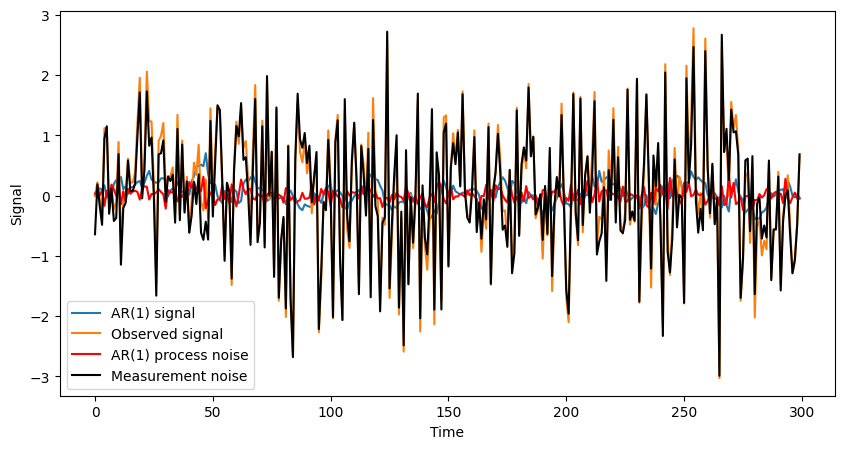

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(mu, label='AR(1) signal')
ax.plot(y, label='Observed signal')
ax.plot(eta, 'r', label='AR(1) process noise')
ax.plot(epsilon, 'k', label='Measurement noise')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
plt.show()

estimate the predicted signal $\mu_{t+1|t} $ using the Kalman filter for different values of the signal to noise ratio, i.e. for different pairs of values of ($\sigma_eta, \sigma_epsilon$), for instance you can use (0.1,1), (1,1), (1,0.1);

In [14]:
mu_pred = np.zeros(n)
P = np.zeros(n)
v = np.zeros(n)
K = np.zeros(n)
F = np.zeros(n)
llk = np.zeros(n)

P[1] = (sigma_eta**2)*(1-phi**2)
llk[1]=0


for t in range(n-1):
    v[t]= y[t] - mu_pred[t]
    F[t] = P[t] + sigma_epsilon**2
    K[t] = (phi * P[t])/F[t]
    P[t+1] = phi**2 * P[t] + sigma_eta**2 -K[t]**2*F[t] 
    mu_pred[t+1] = phi * mu_pred[t] + K[t]*v[t]



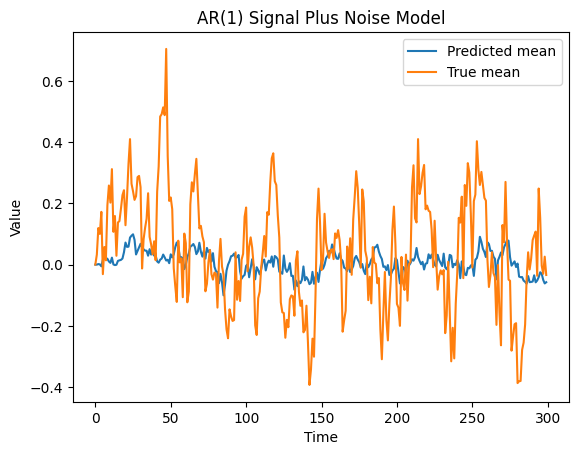

In [15]:
plt.plot(mu_pred, label='Predicted mean')
plt.plot(mu, label='True mean')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('AR(1) Signal Plus Noise Model')
plt.show()
